In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error


In [2]:
data = pd.read_csv("BrooksShoes.csv")
data.head() #5 first rows



,Name,Type,Price,Support,Experience,Surface,Midsole Drop(mm),Weight(g),High Arch,Medium Arch,...,3D Fit Print,DNA AMP,GuideRails,DNA Midsole,Ballistic Rock Shield,Gore-Tex,DNA Flash,Rapid Roll,DNA ZERO,Super DNA
0,Addiction 14,Men's,130.00,Max Support,Cushion,Road,12.0,357.2,NaN,Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Adrenaline GTS 20,Men's,130.00,Support,Cushion,Road,12.0,300.5,Yes,Yes,...,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Anthem 3,Men's,69.95,Neutral,Cushion,Road,10.0,212.6,Yes,Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Asteria,Men's,110.00,Support,Speed,Road,8.0,235.3,NaN,Yes,...,NaN,NaN,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,Beast 20,Men's,160.00,Max Support,Cushion,Road,12.0,331.7,NaN,Yes,...,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
data.shape #dimensionality 

(50, 24)

In [4]:
data.columns



Index(['Name', 'Type', 'Price', 'Support', 'Experience', 'Surface',
       'Midsole Drop(mm)', 'Weight(g)', 'High Arch', 'Medium Arch',
       'Flat Arch', 'Segmented Crash Pad', 'DNA LOFT', 'BioMoGo DNA',
       '3D Fit Print', 'DNA AMP', 'GuideRails', 'DNA Midsole',
       'Ballistic Rock Shield', 'Gore-Tex', 'DNA Flash', 'Rapid Roll',
       'DNA ZERO', 'Super DNA'],
      dtype='object')

In [5]:
data.isna().sum() #check missing values -> 0 means none empty value
data.notna().sum() #opposite of isna

Name                     50
Type                     50
Price                    50
Support                  50
Experience               50
Surface                  50
Midsole Drop(mm)         48
Weight(g)                50
High Arch                39
Medium Arch              50
Flat Arch                16
Segmented Crash Pad       3
DNA LOFT                  8
BioMoGo DNA              34
3D Fit Print              6
DNA AMP                   7
GuideRails               10
DNA Midsole               6
Ballistic Rock Shield     4
Gore-Tex                  2
DNA Flash                 3
Rapid Roll                1
DNA ZERO                  1
Super DNA                 1
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Name                   50 non-null     object 
 1   Type                   50 non-null     object 
 2   Price                  50 non-null     float64
 3   Support                50 non-null     object 
 4   Experience             50 non-null     object 
 5   Surface                50 non-null     object 
 6   Midsole Drop(mm)       48 non-null     float64
 7   Weight(g)              50 non-null     float64
 8   High Arch              39 non-null     object 
 9   Medium Arch            50 non-null     object 
 10  Flat Arch              16 non-null     object 
 11  Segmented Crash Pad    3 non-null      object 
 12  DNA LOFT               8 non-null      object 
 13  BioMoGo DNA            34 non-null     object 
 14  3D Fit Print           6 non-null      object 
 15  DNA AMP 

In [7]:
features_nums  = [feature for feature in data.columns if data[feature].dtypes != 'f'] #->data.columns for float
data[features_nums].head()

,Name,Type,Price,Support,Experience,Surface,Midsole Drop(mm),Weight(g),High Arch,Medium Arch,...,3D Fit Print,DNA AMP,GuideRails,DNA Midsole,Ballistic Rock Shield,Gore-Tex,DNA Flash,Rapid Roll,DNA ZERO,Super DNA
0,Addiction 14,Men's,130.00,Max Support,Cushion,Road,12.0,357.2,NaN,Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Adrenaline GTS 20,Men's,130.00,Support,Cushion,Road,12.0,300.5,Yes,Yes,...,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Anthem 3,Men's,69.95,Neutral,Cushion,Road,10.0,212.6,Yes,Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Asteria,Men's,110.00,Support,Speed,Road,8.0,235.3,NaN,Yes,...,NaN,NaN,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,Beast 20,Men's,160.00,Max Support,Cushion,Road,12.0,331.7,NaN,Yes,...,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
data[features_nums].columns

Index(['Name', 'Type', 'Price', 'Support', 'Experience', 'Surface',
       'Midsole Drop(mm)', 'Weight(g)', 'High Arch', 'Medium Arch',
       'Flat Arch', 'Segmented Crash Pad', 'DNA LOFT', 'BioMoGo DNA',
       '3D Fit Print', 'DNA AMP', 'GuideRails', 'DNA Midsole',
       'Ballistic Rock Shield', 'Gore-Tex', 'DNA Flash', 'Rapid Roll',
       'DNA ZERO', 'Super DNA'],
      dtype='object')

In [9]:
data['Name'].unique #all different shoes brand

<bound method Series.unique of 0          Addiction 14
1     Adrenaline GTS 20
2              Anthem 3
3               Asteria
4              Beast 20
5              Bedlam 3
6             Caldera 4
7           Cascadia 15
8       Cascadia 15 GTX
9             Catamount
10               Divide
11              Dyad 11
12             Ghost 13
13          Glycerin 18
14             Hyperion
15       Hyperion Tempo
16       Hyperion Elite
17             Launch 7
18           Levitate 4
19           PureFlow 7
20           PureGrit 8
21           Ravenna 11
22              Revel 4
23           Ricochet 2
24        Ricochet 2 LE
25          Transcend 7
26             Ghost 13
27    Adrenaline GTS 20
28              Revel 4
29          Glycerin 18
30           Levitate 4
31             Bedlam 3
32         Addiction 14
33           PureFlow 7
34           Ravenna 11
35          Transcend 7
36           Ricochet 2
37          Cascadia 15
38               Divide
39     Hyperion Elite 2
40       

Text(0.5, 1.0, 'Price of the shoes vs its midsole drop')

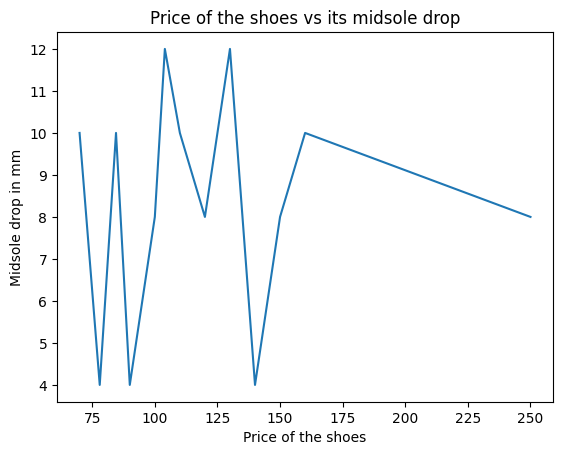

In [10]:
data.groupby('Price')['Midsole Drop(mm)'].median().plot() #Maximalist shoes tend to go more expensively
plt.xlabel('Price of the shoes')
plt.ylabel('Midsole drop in mm')
plt.title('Price of the shoes vs its midsole drop')

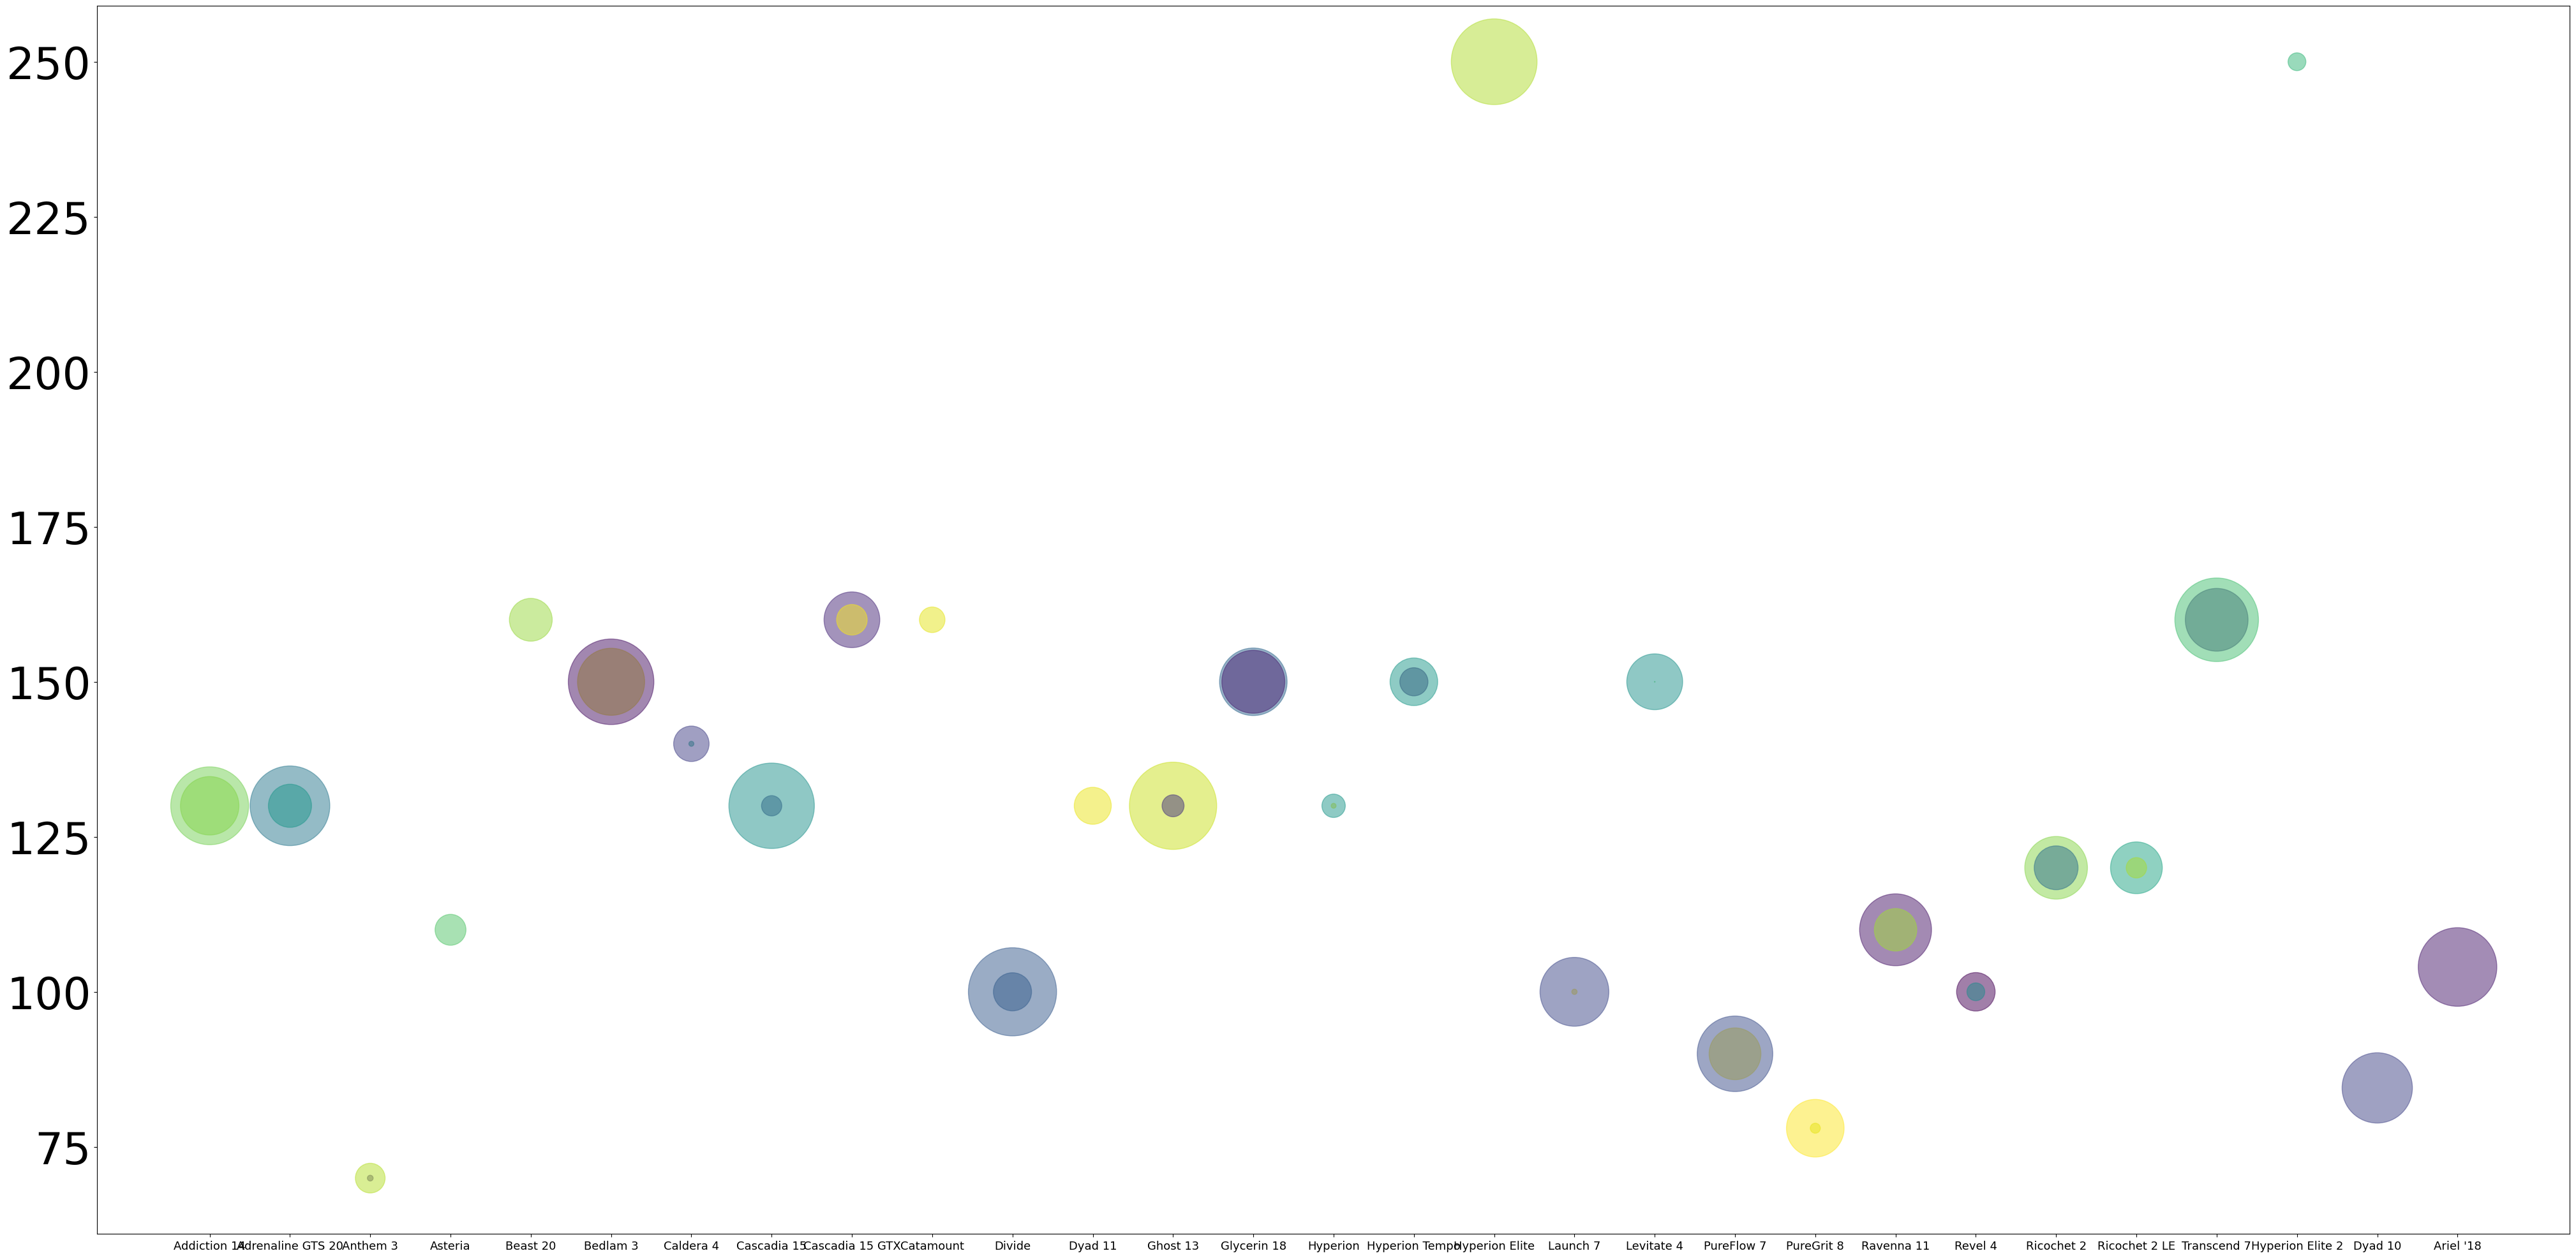

In [13]:
np.random.seed(19680801)
N = 50
x = np.random.rand(N)
y = np.random.rand(N)
colors = np.random.rand(N)
area = (100 * np.random.rand(N))**2  # 0 to 15 point radii

plt.scatter(data['Name'], data['Price'], linestyle='solid',s=area, c=colors, alpha=0.5)
plt.xticks(fontsize=13)
plt.yticks(fontsize=50)
plt.rcParams['figure.figsize'] = [50, 25]

In [15]:
features_nums =['Price','Midsole Drop(mm)','Weight(g)']
for f in features_nums:
    print(data[f])
data[features_nums].head()

0     130.00
1     130.00
2      69.95
3     110.00
4     160.00
5     150.00
6     140.00
7     130.00
8     160.00
9     160.00
10    100.00
11    130.00
12    130.00
13    150.00
14    130.00
15    150.00
16    250.00
17    100.00
18    150.00
19     90.00
20     78.00
21    110.00
22    100.00
23    120.00
24    120.00
25    160.00
26    130.00
27    130.00
28    100.00
29    150.00
30    150.00
31    150.00
32    130.00
33     90.00
34    110.00
35    160.00
36    120.00
37    130.00
38    100.00
39    250.00
40    150.00
41    140.00
42    120.00
43    160.00
44     69.95
45    130.00
46    100.00
47     84.50
48    104.00
49     78.00
Name: Price, dtype: float64
0     12.0
1     12.0
2     10.0
3      8.0
4     12.0
5      8.0
6      4.0
7      8.0
8      8.0
9      NaN
10     8.0
11    10.0
12    12.0
13    10.0
14    10.0
15     8.0
16     8.0
17    10.0
18     8.0
19     4.0
20     4.0
21    10.0
22     8.0
23     8.0
24     8.0
25    10.0
26    12.0
27    12.0
28     8.0
29 

,Price,Midsole Drop(mm),Weight(g)
0,130.00,12.0,357.2
1,130.00,12.0,300.5
2,69.95,10.0,212.6
3,110.00,8.0,235.3
4,160.00,12.0,331.7
